In [ ]:
# This notebook contains the code for the experiments in Section 5.1

In [1]:
%run Correlators_tools.ipynb

### Model characteristics ###

In [2]:
T = 1/2
t = 0 
r = 0.0
mean = 0
tau = np.sqrt(T-t)
sigma = 1
std = sigma*tau

print('mean = ', mean)
print('std = ', std)

mean =  0
std =  0.7071067811865476


## PRICING

In [3]:
# Strike price
K = 0.0

In [4]:
# CLOSED FORMULA
price_exact = (sigma*np.sqrt((T-t)/2/np.pi)*np.exp(-(K**2)/2/(T-t)/sigma)-K*(1-norm.cdf(K/np.sqrt(T-t)/sigma)))*np.exp(-r*(T-t))
print('price_exact = ', price_exact)

price_exact =  0.28209479177387814


In [5]:
# MONTE CARLO SIMULATIONS

N_mc = 100 # number of samples
IT = 20000 # number of iterations for each sample

price_MC = np.zeros(N_mc)
for mc in range(N_mc):
    X = np.random.normal(loc = 0, scale = std, size = IT)
    price = 0
    
    for i in range(IT):
        price += max(X[i]-K,0)*np.exp(-r*(T-t))
    
    price_MC[mc] = np.sum(price)/IT

print('MC_price_interval = [', np.mean(price_MC) - np.std(price_MC), ', ', np.mean(price_MC) + np.std(price_MC), ']')
print('std = ', np.std(price_MC))

MC_price_interval = [ 0.2790782367737531 ,  0.28475869119777475 ]
std =  0.0028402272120108176


In [6]:
accuracy_MC = -np.log10(np.abs(np.mean(price_MC)-price_exact)/price_exact)
print('accuracy_MC = ', accuracy_MC)

accuracy_MC =  3.2040743083063066


### Pricing with generalized Hermite polynomials

In [7]:
# Parameters for the Hermite series 
min_scale = std/np.sqrt(2) #\underline{b}_{\sigma}
print('min_scale = ', min_scale)

drift = mean
scale = min_scale*2
ratio = (K-drift)/scale

print('K = ', K)
print('drift = ', drift)
print('scale = ', scale)
print('ratio = ', ratio)

min_scale =  0.5
K =  0.0
drift =  0
scale =  1.0
ratio =  0.0


In [8]:
# We first calculate the moments of X (see Eq. (4.2))
N = 150 # truncation number

E_N = np.zeros(N+1) 
E_N[0] = 1

for n in range(1,N+1):
    print('---------------- n = ', n)
    E_N_n = 0
    index = multi_index(1, n)
    for i in index:
        coeff = multi_coeff(i)
        power = i[0]
        if power == 0: 
            correlator = 1
        else:    
            correlator = moment_BM(power, std)
        E_N_n = E_N_n + coeff*correlator*((-drift)**(i[1]))
    E_N[n] = E_N_n/(scale**n)

print('E_N = ', E_N)

---------------- n =  1
---------------- n =  2
---------------- n =  3
---------------- n =  4
---------------- n =  5
---------------- n =  6
---------------- n =  7
---------------- n =  8
---------------- n =  9
---------------- n =  10
---------------- n =  11
---------------- n =  12
---------------- n =  13
---------------- n =  14
---------------- n =  15
---------------- n =  16
---------------- n =  17
---------------- n =  18
---------------- n =  19
---------------- n =  20
---------------- n =  21
---------------- n =  22
---------------- n =  23
---------------- n =  24
---------------- n =  25
---------------- n =  26
---------------- n =  27
---------------- n =  28
---------------- n =  29
---------------- n =  30
---------------- n =  31
---------------- n =  32
---------------- n =  33
---------------- n =  34
---------------- n =  35
---------------- n =  36
---------------- n =  37
---------------- n =  38
---------------- n =  39
---------------- n =  40
---------

/var/folders/wh/cbcw_w9x52gczwyz44rzs7xr0000gn/T/ipykernel_5986/1402603017.py:4: DeprecationWarning: Using factorial() with floats is deprecated
  return sigma**p*math.factorial(p)/(2**k)/math.factorial(k)


---------------- n =  84
---------------- n =  85
---------------- n =  86
---------------- n =  87
---------------- n =  88
---------------- n =  89
---------------- n =  90
---------------- n =  91
---------------- n =  92
---------------- n =  93
---------------- n =  94
---------------- n =  95
---------------- n =  96
---------------- n =  97
---------------- n =  98
---------------- n =  99
---------------- n =  100
---------------- n =  101
---------------- n =  102
---------------- n =  103
---------------- n =  104
---------------- n =  105
---------------- n =  106
---------------- n =  107
---------------- n =  108
---------------- n =  109
---------------- n =  110
---------------- n =  111
---------------- n =  112
---------------- n =  113
---------------- n =  114
---------------- n =  115
---------------- n =  116
---------------- n =  117
---------------- n =  118
---------------- n =  119
---------------- n =  120
---------------- n =  121
---------------- n =  122
--

k =  1 , price =  0.3989422804014327
k =  2 , price =  0.3989422804014327 ,  0.382775685337863
k =  3 , price =  0.29920671030107454 ,  1.217096364171697
k =  4 , price =  0.29920671030107454 ,  1.217096364171697
k =  5 , price =  0.2867397640385298 ,  1.783411942844372
k =  6 , price =  0.2867397640385298 ,  1.783411942844372
k =  7 , price =  0.2836230274728936 ,  2.266204727566223
k =  8 , price =  0.2836230274728936 ,  2.266204727566223
k =  9 , price =  0.28264904729613227 ,  2.7066850391432475
k =  10 , price =  0.28264904729613227 ,  2.7066850391432475
k =  11 , price =  0.2823081542342658 ,  3.121277057214583
k =  12 , price =  0.2823081542342658 ,  3.121277057214583
k =  13 , price =  0.28218031933606585 ,  3.518288974581503
------> Accuracy 10**(-3) for k =  13
k =  14 , price =  0.28218031933606585 ,  3.518288974581503
k =  15 , price =  0.28213009848320164 ,  3.9025378259070753
k =  16 , price =  0.28213009848320164 ,  3.9025378259070753
k =  17 , price =  0.282109696261725

k =  150 , price =  -3337856704.0607333 ,  -10.073072620301248


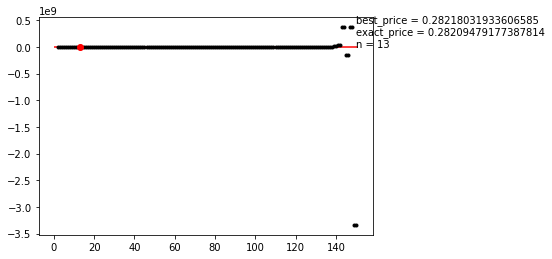

In [9]:
# We now calculate the option price via Hermite series Eq. (4.2)
# We calculate the accuracy accordingly to Eq. (5.2) 
# and we check when the series reaches the same accuracy of the MC simulations

Hprice = np.ones(N+1)*(scale*norm.pdf(ratio)+(mean-K)*(1-norm.cdf(ratio)))*np.exp(-r*(T-t))

notachieved = 1
best_n = -10
best = 0
print('k = ', 1, ', price = ', Hprice[0])
if (-np.log10(abs(price_exact - Hprice[0])/price_exact) > accuracy_MC) and notachieved:
    notachieved = 0
    best = Hprice[0]
    best_n = 1
    print('------> Accuracy 10**(-3) for k = ', 1)

for k in range(2,N+1):
    v_k = hermite(k).c[::-1]
    Hprice[k:] += scale*norm.pdf(ratio)*(hermite(k-2)(ratio)/float(math.factorial(k))*v_k.dot(E_N[:(k+1)]))*np.exp(-r*(T-t))
    print('k = ', k, ', price = ', Hprice[k-1], ', ', -np.log10(abs(price_exact-Hprice[k-1])/price_exact))
    plt.plot(k, Hprice[k-1], 'k.')
    if (-np.log10(abs(price_exact-Hprice[k-1])/price_exact) > accuracy_MC) and notachieved:
        notachieved = 0
        best = Hprice[k-1]
        best_n = k
        print('------> Accuracy 10**(-3) for k = ', k)
    if not notachieved and (k == best_n+15):
        not_casual_bump = 1
        for j in range(best_n, k):
            not_casual_bump = not_casual_bump*(-np.log10(abs(price_exact-Hprice[j-1])/price_exact)>accuracy_MC)
        if not not_casual_bump: notachieved = 1
    
plt.hlines(y = price_exact, xmin=0, xmax = N+1, colors ='red')
s = "best_price = {} \nexact_price = {}\nn = {}"
plt.text(x = N, y = price_exact, s = s.format(best, price_exact, best_n));  
plt.plot(best_n, best, 'ro');

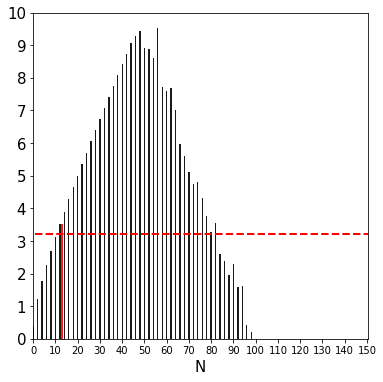

In [10]:
# Plots
range_N = np.arange(0,N+1,2)

f = plt.figure(figsize = (6,6))
ax = plt.axes()
plt.bar(range_N, -np.log10(np.abs(Hprice[range_N]-price_exact)/price_exact), alpha=0.9, color='black', width=0.6);
plt.bar(best_n, -np.log10(np.abs(Hprice[best_n-1]-price_exact)/price_exact), alpha=0.9, color='red', width=0.8);
plt.hlines(y = 0, xmin = 1, xmax = N+0.5,linestyle = 'solid', linewidth = 1, color='black');
plt.hlines(y = accuracy_MC, xmin = 1, xmax = N+0.5,linestyle = 'dashed', linewidth = 2, color='red');
plt.xlim([1.,N+0.5]);
plt.ylim([0, 10])
plt.xlabel('N', fontsize=15)
plt.yticks(np.arange(0,11),np.arange(0,11), fontsize=15)
plt.xticks(range_N[::5], range_N[::5], fontsize=10);
#f.savefig('Plots_BM2/plot_BM2_10_06.pdf', bbox_inches = 'tight', pad_inches = 0.01)